## Supersymmetry and XNOR in quantum computing

There is an interesting connection between Supersymmetry and quantum computing related to spinors that this notebook aims to illustrate.

The space of the fundamental representation of SU(2) group is the space of spinors. 
These are complex two dimensional vectors. For example,

$$
z =  
\begin{pmatrix}
z^{0} \\
z^{1}
\end{pmatrix}
$$

where $$z^{0},z^{1}$$ are some complex numbers. Let's look at some antisymmetric tensors 

$$
\epsilon^{\alpha\beta} = \begin{pmatrix}
0 & -1 \\
1 & 0 
\end{pmatrix}
$$ 

and

$$
\epsilon_{\alpha\beta} = \begin{pmatrix}
0 & 1 \\
-1 & 0 
\end{pmatrix},
$$ 
which can be used for raising and lowering indices of spinors. For example, in Supersymmetric Gauge Field Theories we deal with

$$\chi_{\alpha}=\epsilon_{\alpha\beta}\chi^{\beta}$$
$$\overline{\psi}^\dot{\alpha}=\epsilon^{\dot{\alpha}\dot{\beta}}\overline{\psi}_\dot{\beta}$$

where $$\chi,\overline{\psi}$$
are spinors.

We can easily verify that
$$\epsilon^{\alpha\beta}\epsilon_{\beta\gamma}={\delta^{\alpha}}_{\gamma}$$
where 
$${\delta^{\alpha}}_{\gamma}$$
is the Kronecker delta, which equals 1 if $$\alpha=\gamma$$
and 0 otherwise.
To convince yourself, just multiply
$$
\epsilon^{\alpha\beta} = \begin{pmatrix}
0 & -1 \\
1 & 0 
\end{pmatrix}
$$ 
with
$$
\epsilon_{\alpha\beta} = \begin{pmatrix}
0 & 1 \\
-1 & 0 
\end{pmatrix}
$$ 
and you will get unit 2 by 2 matrix
$$I_2=\begin{pmatrix}
1 & 0 \\
0 & 1 
\end{pmatrix}.
$$ 

Now, what's interesting here is this unit matrix can be viewed as XNOR truth table if you carefully look at it's elements:

$$I_{00}=1,I_{01}=0,I_{10}=0,I_{11}=1.$$

We can construct a quantum circuit with 3 qubits to represent this gem.

First 2 qubit states represents rows and columns of the unit matrix and the third qubit state represents the value of the respective matrix element. 

For example, for

$$I_{10}=0$$

element the first qubit state is 1, the second qubit state is 0 and the third qubit state is 0.

Below is the quantum circuit that implements this.

Results: {'001': 976, '111': 1041, '100': 1048, '010': 1031}


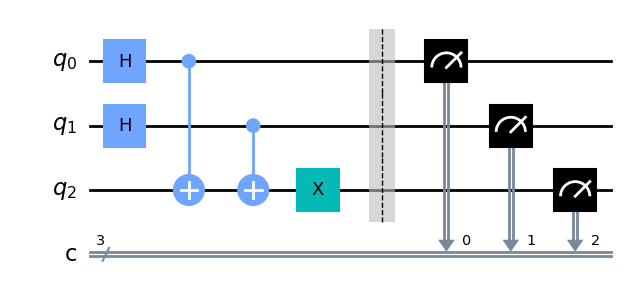

In [10]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumCircuit, Aer, execute

# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)
qc.h([0,1])

# XOR between the first two qubits
qc.cx(0, 2)  # XOR result stored in the 3rd qubit
qc.cx(1, 2)  # Additional XOR operation with the second qubit
qc.x(2)
qc.barrier()

# Measure all qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=4096).result()

# Get and print the results
counts = result.get_counts()
print("Results:", counts)

# Draw the quantum circuit
qc.draw(output='mpl')

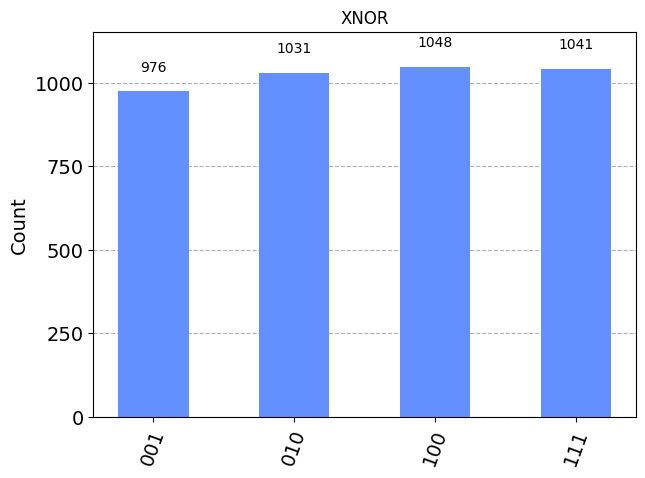

In [11]:
plot_histogram(counts, title='XNOR')

Can you recognize the unit 2 by 2 matrix pattern in the above histogram?

It is inspiring that the above little quantum circuit can be viewed as a computational representation of this mathematical identity
$$\epsilon^{\alpha\beta}\epsilon_{\beta\gamma}={\delta^{\alpha}}_{\gamma}.$$